In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

data = "data"

In [4]:
image_dir = Path(data)
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [5]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("sea").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest',
    validation_split=0.2) 

In [7]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_images = train_datagen.flow_from_directory(
    data ,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') 

Found 63 images belonging to 7 classes.
Found 14 images belonging to 7 classes.


In [8]:
mobile_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

mobile_model.add(pretrained_model)

In [9]:
mobile_model.add(Flatten())
mobile_model.add(Dense(512, activation='relu'))
mobile_model.add(Dropout(0.2))
mobile_model.add(Dense(7, activation='softmax'))

In [10]:
mobile_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 2,917,447
Trainable params: 659,463
Non-trainable params: 2,257,984
________________________________________

In [11]:
mobile_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

history = mobile_model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 1.8243 - accuracy: 0.3333 - val_loss: 1.2781 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 705ms/step - loss: 0.9450 - accuracy: 0.6825 - val_loss: 0.8757 - val_accuracy: 0.7143
Epoch 3/100
2/2 [==============================] - 1s 789ms/step - loss: 0.4235 - accuracy: 0.8889 - val_loss: 0.5568 - val_accuracy: 0.7143
Epoch 4/100
2/2 [==============================] - 2s 857ms/step - loss: 0.2706 - accuracy: 0.9683 - val_loss: 0.7367 - val_accuracy: 0.6429
Epoch 5/100
2/2 [==============================] - 1s 834ms/step - loss: 0.2150 - accuracy: 0.9365 - val_loss: 0.4195 - val_accuracy: 0.8571
Epoch 6/100
2/2 [==============================] - 2s 938ms/step - loss: 0.1498 - accuracy: 0.9524 - val_loss: 0.6890 - val_accuracy: 0.7857
Epoch 7/100
2/2 [==============================] - 1s 801ms/step - loss: 0.0858 - accuracy: 0.9841 - val_loss: 0.5937 - val_accuracy: 0.7857
Epoch 8/100
2/2 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


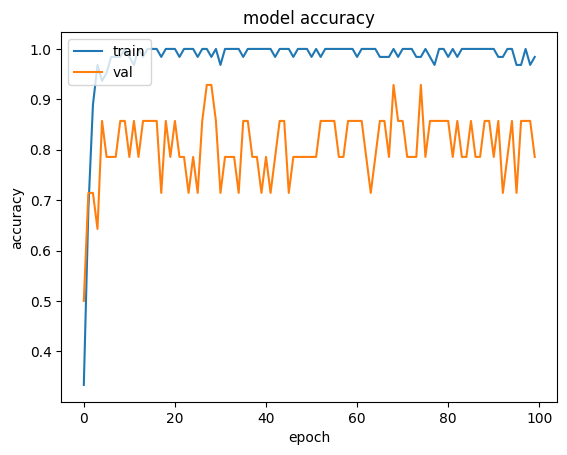

In [12]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

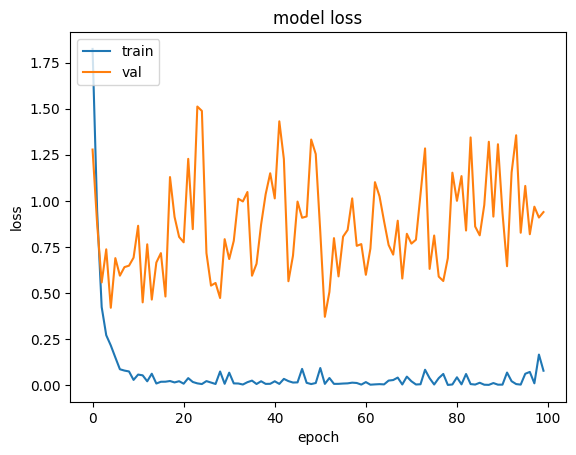

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

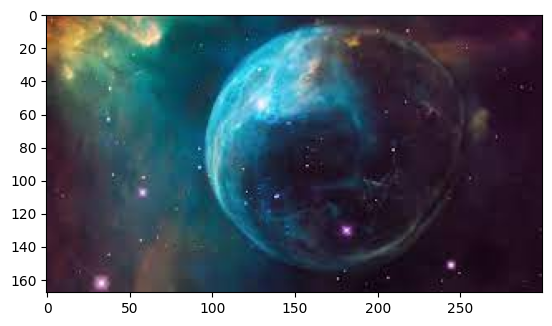

In [14]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('data/bubble/download.jpeg'))


In [15]:
import cv2
import numpy as np


In [16]:

image_path = "data/helix/download (5).jpeg"  
image_size = (224, 224)  


In [17]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)  
    image = cv2.resize(image, image_size)  
    image = image / 255.0 
    return np.expand_dims(image, axis=0)

new_image = preprocess_image(image_path)



In [18]:

prediction_probabilities = mobile_model.predict(new_image)


class_names = ["bubble", "crab", "dark", "helix", "planetary", "ring", "tarantula"]
predicted_class_index = np.argmax(prediction_probabilities)
predicted_class_label = class_names[predicted_class_index]



1/1 [==============================] - 1s 705ms/step


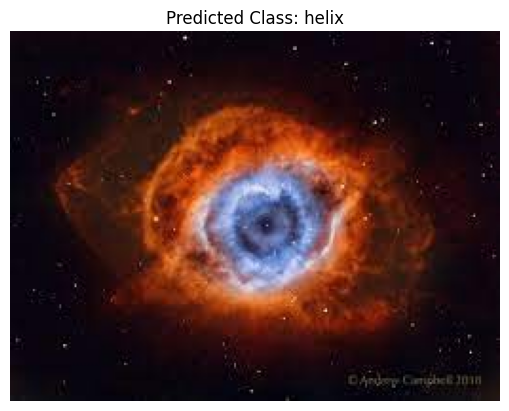

In [19]:

import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)) 
plt.title("Predicted Class: " + predicted_class_label)
plt.axis("off")
plt.show()